In [81]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import tree


In [2]:
events_train = pd.read_csv('C:\\Users\\fight\\Downloads\\event_data_train.zip')

In [3]:
submissions_train = pd.read_csv('C:\\Users\\fight\\Downloads\\submissions_data_train.zip')

In [4]:
events_train

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [5]:
submissions_train

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [6]:
events_train['date'] = pd.to_datetime(events_train.timestamp, unit='s')

In [7]:
events_train

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [8]:
events_train.date.min()

Timestamp('2015-06-15 04:00:48')

In [9]:
events_train.date.max()

Timestamp('2018-05-19 23:33:31')

In [10]:
events_train['day'] =events_train.date.dt.date

In [11]:
events_train

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<AxesSubplot:xlabel='day'>

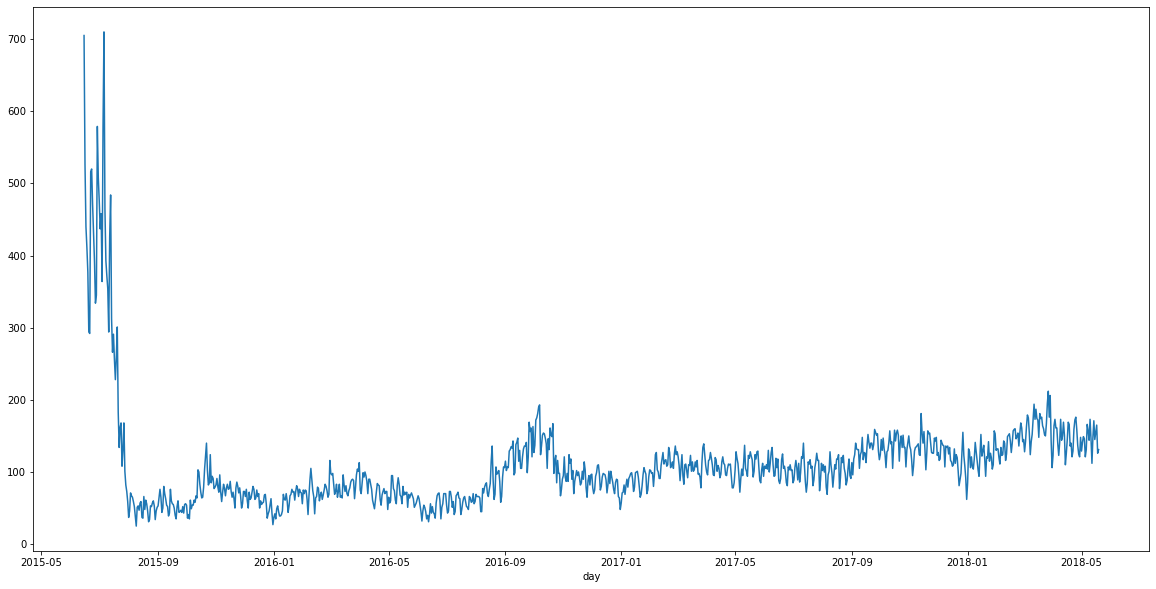

In [12]:
events_train.groupby('day').\
    user_id.nunique().plot(figsize=(20,10))

In [13]:
events_train[events_train.action== 'passed'].\
    groupby('user_id', as_index=False)\
    .aggregate({'step_id':'count'})\
    .rename(columns={'step_id':'passed'})

,user_id,passed
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
17257,26789,2
17258,26790,8
17259,26794,69
17260,26797,10


In [14]:
users_events = events_train.pivot_table(index='user_id',
                         columns='action',
                         values='step_id', 
                         aggfunc='count', 
                         fill_value=0).reset_index()

In [15]:
submissions_train['date'] = pd.to_datetime(submissions_train.timestamp, unit='s')

In [16]:
submissions_train['day'] =submissions_train.date.dt.date

In [17]:
submissions_train

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [18]:
users_scores = submissions_train.pivot_table(index='user_id',
                              columns='submission_status',
                              values='step_id',
                              aggfunc='count',
                              fill_value=0).reset_index()

In [19]:
gap_data = events_train[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [20]:
gap_data= pd.Series(np.concatenate(gap_data, axis=0))

In [21]:
gap_data = gap_data /(24 * 60 * 60)

<AxesSubplot:>

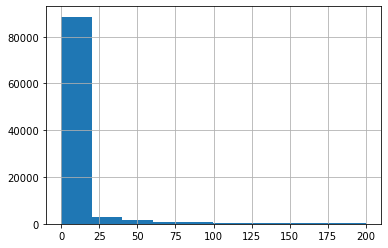

In [22]:
gap_data[gap_data < 200].hist()

In [23]:
gap_data.quantile(0.95)

59.760440972222156

In [24]:
events_train.groupby('user_id').count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000022112C740A0>>

In [25]:
events_train.groupby(['action']).count()

,step_id,timestamp,user_id,date,day
action,,,,,
discovered,689495,689495,689495,689495,689495
passed,650331,650331,650331,650331,650331
started_attempt,310047,310047,310047,310047,310047
viewed,1830830,1830830,1830830,1830830,1830830


In [26]:
hoba = events_train.pivot_table(index='user_id',
                         columns='action',
                         values='step_id', 
                         aggfunc='count', 
                         fill_value=0).reset_index()

In [27]:
hoba = pd.to_numeric(hoba['viewed'])

In [28]:
events_train.groupby('user_id')['day'].nunique().idxmax()

1046

In [29]:
users_data = events_train.groupby('user_id', as_index=False)\
    .agg({'timestamp':'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [30]:
now = 1520978742
drop_out = 2592000

In [31]:
users_data['is_user_gone'] = (now - users_data.last_timestamp) > drop_out

In [32]:
users_data

,user_id,last_timestamp,is_user_gone
0,1,1472827464,True
1,2,1519226966,False
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,False
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [33]:
users_data = users_data.merge(users_scores, how='outer')

In [34]:
users_data.fillna(0)

,user_id,last_timestamp,is_user_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,False,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,False,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [35]:
users_data = users_data.merge(users_events, how='outer')


In [36]:
users_data

,user_id,last_timestamp,is_user_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,NaN,NaN,1,0,0,1
1,2,1519226966,False,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,False,NaN,NaN,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,NaN,NaN,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [37]:
users_data = users_data.fillna(0)

In [38]:
users_day = events_train.groupby('user_id').day.nunique()

In [39]:
users_day = users_day.to_frame().reset_index()

In [40]:
users_data = users_data.merge(users_day, how='outer')

In [41]:
users_data

,user_id,last_timestamp,is_user_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,False,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,False,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [42]:
users_data.user_id.nunique()

19234

In [43]:
events_train.user_id.nunique()

19234

In [44]:
users_data['passed_corse'] = users_data.passed > 170

In [45]:
users_data.groupby('passed_corse').count()


,user_id,last_timestamp,is_user_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


<AxesSubplot:>

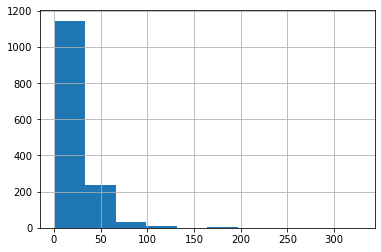

In [46]:
users_data[users_data.passed_corse].day.hist()

In [47]:
min_date_time = events_train.groupby('user_id', as_index=False).\
    agg({'timestamp':'min'})\
    .rename(columns={'timestamp':"min_timestamp"})

In [48]:
min_date_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [49]:
users_data = users_data.merge(min_date_time, how = 'outer')

In [50]:
event_data_train = events_train.merge(users_data[['user_id', 'min_timestamp']], on='user_id', how='left') \
    .query("(timestamp - min_timestamp) < (3 * 24 * 60 * 60)")

In [51]:
event_data_train

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848
...,...,...,...,...,...,...,...
3480530,32953,1526766998,viewed,24555,2018-05-19 21:56:38,2018-05-19,1526729867
3480531,32953,1526766998,discovered,24555,2018-05-19 21:56:38,2018-05-19,1526729867
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750


In [52]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [ ]:
data_wrong = data.groupby(['user_id'], as_index=False)\
    .aggregate({'timestamp':'max'})\
    .rename(columns={'timestamp':'max_timestamp'})

In [ ]:
data = data.merge(data_wrong, how='outer')

In [ ]:
data = data.query('submission_status == "wrong"')

In [ ]:
data.query('timestamp == max_timestamp').step_id.value_counts()

In [ ]:
data

In [53]:
event_data_train.groupby('user_id').day.nunique().max()

4

In [54]:
submissions_data_train = submissions_train.merge(users_data[['user_id', 'min_timestamp']], on='user_id', how='left') \
    .query("(timestamp - min_timestamp) < (3 * 24 * 60 * 60)")

In [55]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1434345977
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1434345977
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434345977
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15,1434345977
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15,1434345977
...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05,1501946660
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18,1503055287
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25,1506347263
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06,1523035269


In [56]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [57]:
X

,user_id,day
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
...,...,...
8908,26787,1
8909,26790,1
8910,26794,3
8911,26797,1


In [58]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index()\
    .rename(columns={'step_id':'steps_tried'})

In [59]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [61]:
X

,user_id,day,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [62]:
X = X.merge(submissions_train.pivot_table(index='user_id',
                         columns='submission_status',
                         values='step_id', 
                         aggfunc='count', 
                         fill_value=0).reset_index())

In [63]:
X['corect_ratio'] = X.correct/(X.correct + X.wrong) 

In [64]:
X

,user_id,day,steps_tried,correct,wrong,corect_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,29,23,0.557692
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,77,106,0.420765
...,...,...,...,...,...,...
8908,26787,1,3,3,0,1.000000
8909,26790,1,1,1,0,1.000000
8910,26794,3,27,33,9,0.785714
8911,26797,1,2,2,0,1.000000


In [65]:
X = X.merge(events_train.pivot_table(index='user_id',
                         columns='action',
                         values='step_id', 
                         aggfunc='count', 
                         fill_value=0).reset_index()[['user_id', 'viewed']], how ='outer')

In [66]:
X = X.fillna(0)

In [67]:
X = X.merge(users_data[['user_id', 'passed_corse', 'is_user_gone']], how='outer')

In [68]:
X = X[~((X.passed_corse == False) & (X.is_user_gone == False))]

In [69]:
X.groupby(['passed_corse', 'is_user_gone']).user_id.count()

passed_corse  is_user_gone
False         True            14719
True          False             372
              True             1053
Name: user_id, dtype: int64

In [70]:
y = X.passed_corse.map(int)

In [71]:
X = X.drop(['passed_corse', 'is_user_gone'], axis = 1)

In [72]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis = 1)

In [73]:
X

,day,steps_tried,correct,wrong,corect_ratio,viewed
user_id,,,,,,
3,1.0,4.0,29.0,23.0,0.557692,192
8,1.0,11.0,9.0,21.0,0.300000,156
14,1.0,1.0,0.0,1.0,0.000000,9
16,3.0,23.0,77.0,106.0,0.420765,651
17,1.0,1.0,0.0,2.0,0.000000,13
...,...,...,...,...,...,...
26773,0.0,0.0,0.0,0.0,0.000000,1
26774,0.0,0.0,0.0,0.0,0.000000,1
26781,0.0,0.0,0.0,0.0,0.000000,698


In [88]:
clf = tree.DecisionTreeClassifier()

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dt = tree.DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth': range(3,6), 'max_leaf_nodes':range(6,15), 'min_samples_leaf': range(1,4),'min_samples_split':range(2,5)}
grid_search_cv_clf = GridSearchCV(dt,parameters,cv=4)
grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, cross_val_score(model,X_train,y_train,cv=4).mean())

{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9908630851986893


In [96]:
model.score(X_test, y_test)

0.9919479715082069

In [98]:
y_pred = model.predict(X_test)

In [100]:
from sklearn.metrics import precision_score, recall_score

In [101]:
precision_score(y_test, y_pred)

0.9326923076923077

In [102]:
recall_score(y_test, y_pred)

0.9831081081081081

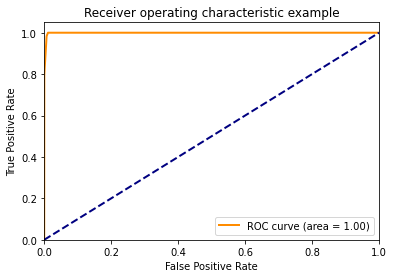

In [104]:
y_predicted_prob = model.predict_proba(X_test)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw= lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

[Text(772.2321428571428, 1223.1, 'correct <= 64.5\nentropy = 0.431\nsamples = 16144\nvalue = [14719, 1425]'),
 Text(448.3928571428571, 951.3, 'viewed <= 278.5\nentropy = 0.095\nsamples = 14847\nvalue = [14667, 180]'),
 Text(199.28571428571428, 679.5, 'viewed <= 252.5\nentropy = 0.002\nsamples = 14237\nvalue = [14235, 2]'),
 Text(99.64285714285714, 407.69999999999993, 'entropy = 0.0\nsamples = 14122\nvalue = [14122, 0]'),
 Text(298.92857142857144, 407.69999999999993, 'entropy = 0.127\nsamples = 115\nvalue = [113, 2]'),
 Text(697.5, 679.5, 'day <= 0.5\nentropy = 0.871\nsamples = 610\nvalue = [432, 178]'),
 Text(498.21428571428567, 407.69999999999993, 'viewed <= 2953.0\nentropy = 0.876\nsamples = 220\nvalue = [65, 155]'),
 Text(398.57142857142856, 135.89999999999986, 'entropy = 0.845\nsamples = 213\nvalue = [58, 155]'),
 Text(597.8571428571429, 135.89999999999986, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(896.7857142857142, 407.69999999999993, 'correct <= 53.5\nentropy = 0.323\

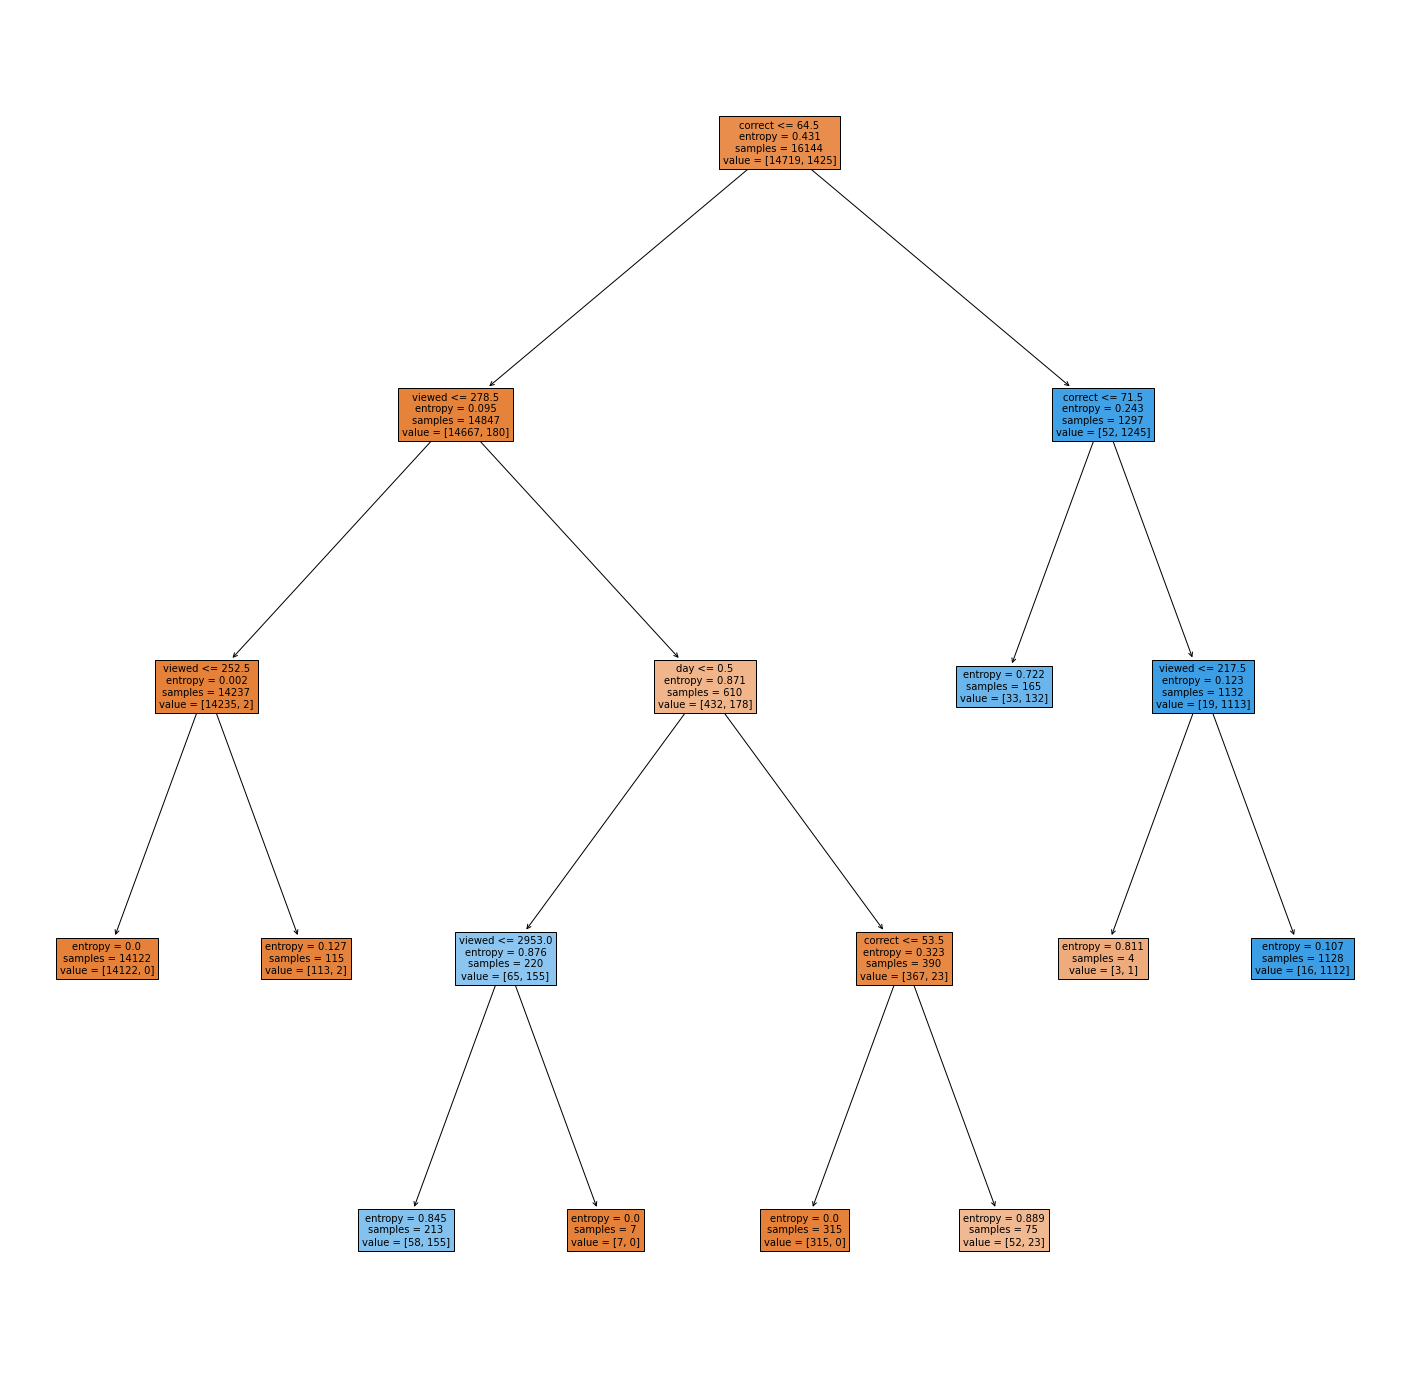

In [108]:
plt.figure(figsize=(25, 25))
tree.plot_tree(model, fontsize=10, feature_names=list(X), filled=True)